# Setting up a notebook for the capstone project 

## Author : Djaber Berrian

### Summary : Applied Machine Learning Techniques 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


###  Loading sun roof data from the Github account

In [3]:
df_sun_roof= pd.read_csv("https://raw.githubusercontent.com/dberrian/capstone-project/master/project-sunroof.csv") # sun roof data

df_dscpt = pd.read_csv('https://raw.githubusercontent.com/dberrian/capstone-project/master/metadata.csv', delimiter=';') # description of sun roof data columns 

### More about the data set of interesrt 

In this project we will be analysing the sun roof data from Google. Here what is about:

As the price of installing solar has gotten less expensive, more homeowners are turning to it as a possible option for decreasing their energy bill. The project wants to make installing solar panels easy and understandable for anyone. 

Project Sunroof puts Google's expansive data in mapping and computing resources to use, helping calculate the best solar plan for you.

More information about the project can be found on their home pgae https://www.google.com/get/sunroof/about/

### Data Exploratory Analysis

In [4]:
df_sun_roof.head() # Displying the first 5 rows of the sun roof data 

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,Pennsylvania,40.701884,40.612937,-75.462191,-75.546116,40.650352,-75.495835,985.150000,7673,...,1.002516e+07,3.514971e+07,2.304186e+07,2.454188e+07,5.992748e+07,9215.539380,1.526861e+08,"[[0,2009],[5,2674],[10,1358],[15,696],[20,286]...",97025.991471,11
1,NaN,NaN,32.551561,32.542257,-116.919812,-117.030077,32.548449,-116.956736,1300.500000,2,...,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000,0
2,Aberdeen,North Carolina,35.183959,35.053605,-79.388482,-79.538347,35.143597,-79.424747,1083.750000,1078,...,9.168585e+05,5.550471e+06,4.255421e+06,3.855701e+06,3.027457e+07,11665.383398,4.485302e+07,"[[0,250],[5,308],[10,181],[15,82],[20,35],[25,...",26330.806205,0
3,Abilene,Texas,32.614325,32.236656,-99.589583,-100.086436,32.435016,-99.750683,1252.411447,42802,...,5.603976e+07,2.343579e+08,1.400185e+08,2.035497e+08,6.438137e+08,15695.829395,1.277779e+09,"[[0,5788],[5,13535],[10,10456],[15,5265],[20,2...",621366.849401,25
4,Abington,Massachusetts,42.147124,42.088107,-70.918676,-71.001744,42.116700,-70.954330,974.091632,3285,...,5.326572e+05,1.327014e+07,5.996178e+06,6.785506e+06,2.302204e+07,6551.267090,4.960652e+07,"[[0,1270],[5,1351],[10,333],[15,80],[20,33],[2...",21479.144107,107


#### As can be seen for each state there might be several regions, and for each region many parameters related the sun roof project are reported

In [5]:
df_dscpt.rename(columns={'Field':'Column name'})# data description of each columnz

,Column name,Description
0,region_name,"Region name (census tract, zip code, city, cou..."
1,count_qualified,# of buildings in Google Maps that are suitabl...
2,percent_covered,% of buildings in Google Maps covered by Proje...
3,percent_qualified,% of buildings covered by Project Sunroof that...
4,yearly_sunlight_kwh_kw_threshold_avg,75% of the optimimum sunlight in the county co...
5,yearly_sunlight_kwh_total,total solar energy generation potential for al...
6,yearly_sunlight_kwh_f,total solar energy generation potential for fl...
7,yearly_sunlight_kwh_n,total solar energy generation potential for no...
8,yearly_sunlight_kwh_e,total solar energy generation potential for ea...
9,yearly_sunlight_kwh_s,total solar energy generation potential for so...


In [6]:
print( 'The are {} columns in sun roof data set'.format(len(df_sun_roof.columns.to_list())))

The are 31 columns in sun roof data set


Exploring  the info of the data set

In [7]:
df_sun_roof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7930 entries, 0 to 7929
Data columns (total 31 columns):
region_name                             7928 non-null object
state_name                              7929 non-null object
lat_max                                 7930 non-null float64
lat_min                                 7930 non-null float64
lng_max                                 7930 non-null float64
lng_min                                 7930 non-null float64
lat_avg                                 7930 non-null float64
lng_avg                                 7930 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    7929 non-null float64
count_qualified                         7930 non-null int64
percent_covered                         7930 non-null float64
percent_qualified                       7930 non-null float64
number_of_panels_n                      7930 non-null int64
number_of_panels_s                      7930 non-null int64
number_of_panels_e               

####  As can be seen there is a mismatch in sun roof data, i.e most of sun roof data set have columns with around 7930 non null values, except some columns have  7899 non null values

### Data wrangling 

As we have seen that some rows of sun roof data set have nan values, we are going to drop them

In [8]:
df_sun_roof.dropna(inplace=True)

Let's look to the data info again

In [9]:
df_sun_roof.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7897 entries, 2 to 7929
Data columns (total 31 columns):
region_name                             7897 non-null object
state_name                              7897 non-null object
lat_max                                 7897 non-null float64
lat_min                                 7897 non-null float64
lng_max                                 7897 non-null float64
lng_min                                 7897 non-null float64
lat_avg                                 7897 non-null float64
lng_avg                                 7897 non-null float64
yearly_sunlight_kwh_kw_threshold_avg    7897 non-null float64
count_qualified                         7897 non-null int64
percent_covered                         7897 non-null float64
percent_qualified                       7897 non-null float64
number_of_panels_n                      7897 non-null int64
number_of_panels_s                      7897 non-null int64
number_of_panels_e               

####  Right now, the columns all have the same amount of non-null values which is 7897

Let's see how many US states are available in the data set

In [10]:
print('There are {} states in sun roof data set'.format(len(df_sun_roof['state_name'].unique())))

There are 51 states in sun roof data set


Let's see how many regions are available in the data set for each state

Text(0, 0.5, 'number of regions')

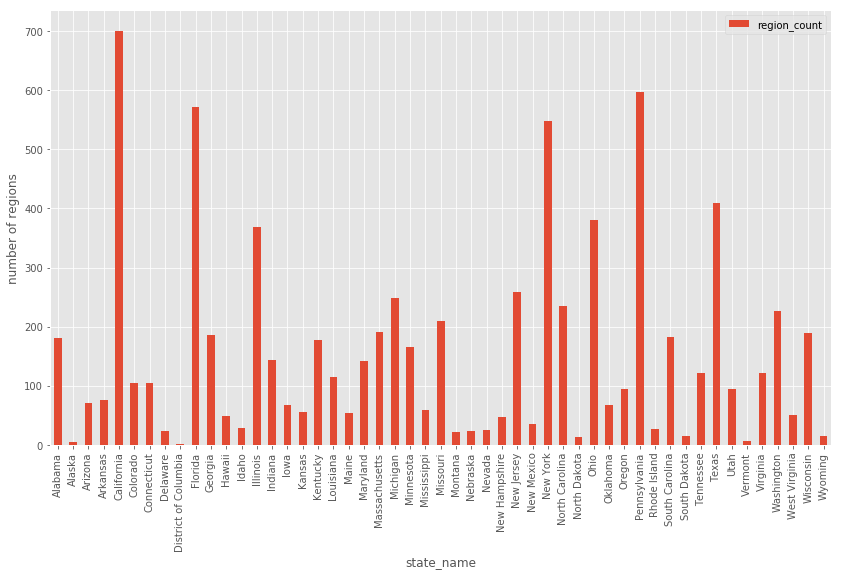

In [11]:
df_sun_roof.groupby('state_name')['region_name'].count().to_frame('region_count').plot(kind='bar', figsize=(14,8))
plt.ylabel('number of regions')

#### As can be seen California stand out in terms of number of regions available in sun roof data (approx 700 regions), followed by Florida, New York and Pensylvania

#### Besed on these results, we've decided to concentrate our analysis only on California state as it has the highest number of regions covered by sun roof project.

Let's slice the sun roof data set on select only data relevant to California state

In [12]:
df_sun_roof_ca = df_sun_roof[df_sun_roof['state_name']=='California']

In [13]:
df_sun_roof_ca.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
7,Acampo,California,38.241483,38.149618,-121.110576,-121.418479,38.202210,-121.220433,1227.400000,426,...,8.103408e+05,3.371186e+06,1.649035e+06,2.355773e+06,8.871234e+06,16178.506543,1.705757e+07,"[[0,88],[5,104],[10,64],[15,48],[20,36],[25,19...",4650.422573,13
18,Adelanto,California,34.650980,34.507017,-117.384277,-117.644424,34.542087,-117.425691,1447.550000,5734,...,2.963809e+06,3.703843e+07,2.262935e+07,3.094269e+07,1.873515e+07,15854.722742,1.123094e+08,"[[0,745],[5,2454],[10,1602],[15,609],[20,181],...",30619.036114,12
26,Agoura Hills,California,34.181139,34.081214,-118.706538,-118.832142,34.150608,-118.762603,1285.221967,6729,...,1.103380e+07,4.770091e+07,3.650439e+07,3.953468e+07,5.775215e+07,19416.851941,1.925259e+08,"[[0,559],[5,1689],[10,1843],[15,1225],[20,597]...",52488.541466,457
39,Alameda,California,37.794489,37.719660,-122.224860,-122.325079,37.762103,-122.254871,1229.950000,16065,...,1.787365e+07,6.077814e+07,4.997127e+07,4.961848e+07,2.131905e+08,10014.910840,3.914320e+08,"[[0,4807],[5,6116],[10,2460],[15,884],[20,402]...",106306.223473,208
40,Alamo,California,37.902786,37.809814,-121.937612,-122.066855,37.856852,-122.018646,1237.600000,5338,...,8.360806e+06,3.997040e+07,2.225215e+07,3.216661e+07,1.061962e+07,17009.517053,1.133696e+08,"[[0,711],[5,1328],[10,1250],[15,826],[20,561],...",30908.068122,999


We drop columns which are not useful for our analaysis 

In [14]:
clm_drop = ['lat_max', 'lat_min', 'lng_max', 'lng_min', 'yearly_sunlight_kwh_kw_threshold_avg', 'percent_covered', 'percent_qualified', 'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e', 'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median', 'kw_median', 'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w', 'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json', 'carbon_offset_metric_tons', 'existing_installs_count']

In [15]:
df_sun_roof_ca.drop(clm_drop, axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
df_sun_roof_ca.reset_index(drop=True, inplace=True) # reset the indices after dropping 

In [17]:
df_sun_roof_ca.rename(columns = {'lat_avg':'latitude', 'lng_avg':'longitude'}, inplace=True)
df_sun_roof_ca.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,region_name,state_name,latitude,longitude,count_qualified,number_of_panels_total,kw_total
0,Acampo,California,38.202210,-121.220433,426,46927.0,11731.75
1,Adelanto,California,34.542087,-117.425691,5734,261242.0,65310.50
2,Agoura Hills,California,34.150608,-118.762603,6729,506106.0,126526.50
3,Alameda,California,37.762103,-122.254871,16065,1092989.0,273247.25
4,Alamo,California,37.856852,-122.018646,5338,324371.0,81092.75


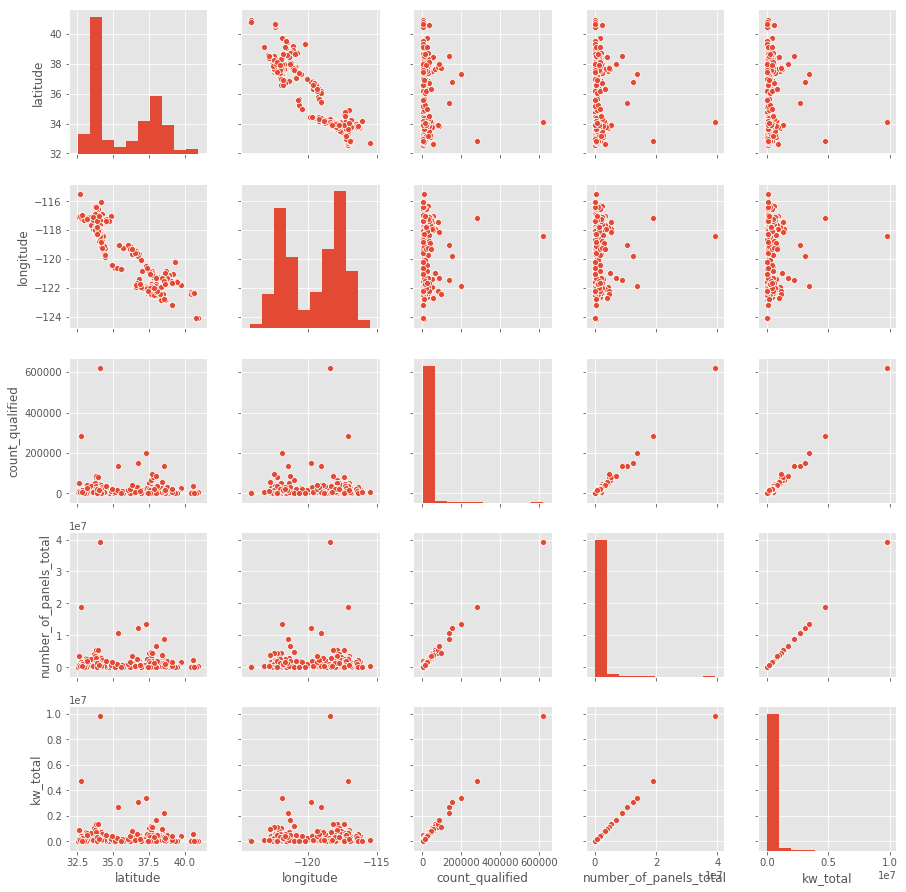

In [54]:
#Plot correlation of this parameters with seaborn to find out any linear dependency
import seaborn as sns
g = sns.pairplot(df_sun_roof_ca)

1-Looking the correlation plot, we can observe linear dependency between variables. Such as num_of_panel and kw_total .Vs count_qualified.



2- Interestingly lookinng at the correlation between the latitude and logitude, we can infer that the data are measured in regions from south toward north-west.

We use Foursquare API to explore the available categories of each region

#### Define Foursquare Credentials and Version

In [19]:
CLIENT_ID = 'X5NE31T5Y1GPRXLYUJRXTXYJWNG3CFCFZOPDB4VRZGDGBK5W' # your Foursquare ID
CLIENT_SECRET = 'TN11F1W0PA5KSQJCV0R003T5KOXGDD04MQK3VRQL10CFHXGI' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: X5NE31T5Y1GPRXLYUJRXTXYJWNG3CFCFZOPDB4VRZGDGBK5W
CLIENT_SECRET:TN11F1W0PA5KSQJCV0R003T5KOXGDD04MQK3VRQL10CFHXGI


#### Let's explore the first region name in our dataframe.

In [20]:
df_sun_roof_ca.loc[0, 'region_name']

'Acampo'

Get the neighborhood's latitude and longitude values.

In [21]:
neighborhood_latitude = df_sun_roof_ca.loc[2, 'latitude'] # neighborhood latitude value
neighborhood_longitude = df_sun_roof_ca.loc[2, 'longitude'] # neighborhood longitude value

neighborhood_name =df_sun_roof_ca.loc[2, 'region_name'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Agoura Hills are 34.150608352711025, -118.76260270442972.


#### Now, let's get the top 100 venues that are in Acampo region within a radius of 500 meters.

In [22]:
# type your answer here
LIMIT = 50
radius= 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=X5NE31T5Y1GPRXLYUJRXTXYJWNG3CFCFZOPDB4VRZGDGBK5W&client_secret=TN11F1W0PA5KSQJCV0R003T5KOXGDD04MQK3VRQL10CFHXGI&v=20180605&ll=34.150608352711025,-118.76260270442972&radius=500&limit=50'

In [23]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
results = requests.get(url).json()
results.keys()

dict_keys(['meta', 'response'])

In [24]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [25]:
results

{'meta': {'code': 200, 'requestId': '5d8cfdccf1110b0038ac08e6'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Agoura Hills',
  'headerFullLocation': 'Agoura Hills',
  'headerLocationGranularity': 'city',
  'totalResults': 14,
  'suggestedBounds': {'ne': {'lat': 34.15510835721103,
    'lng': -118.7571752111057},
   'sw': {'lat': 34.14610834821102, 'lng': -118.76803019775375}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b197d20f964a52041de23e3',
       'name': 'Italia Deli & Bakery',
       'location': {'address': '5657 Kanan Rd',
        'crossStreet': 'at Thousand Oaks Blvd',
        'lat': 34.153098970168415,
        'lng': -118.75903668039842,
        'labeledLatLngs': [

In [26]:
venues = results['response']['groups'][0]['items'] # get venues from the json file
    
nearby_venues = json_normalize(venues) # flatten JSON ... convert to dataframe

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Italia Deli & Bakery,Deli / Bodega,34.153099,-118.759037
1,Sushi Raku,Sushi Restaurant,34.148230,-118.760163
2,Lal Mirch,Indian Restaurant,34.147822,-118.760536
3,Taco Bell,Fast Food Restaurant,34.151700,-118.758719
4,CVS pharmacy,Pharmacy,34.152485,-118.758758


In [36]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


In [37]:
df_sun_roof_ca =df_sun_roof_ca[df_sun_roof_ca.count_qualified>=1500]# Due to quota limit of Foursquare API, we choose only regions with high or equal to count_qualified of 1500

In [38]:
df_sun_roof_ca.reset_index(inplace=True, drop=True) # reset the index

In [39]:
df_sun_roof_ca.shape # check the shape of df_sun_roof_ca data frame

(500, 7)

#### Let's create a function to repeat the same process to all the regions in California

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
# type your answer here

california_venues = getNearbyVenues(names=df_sun_roof_ca['region_name'],
                                   latitudes=df_sun_roof_ca['latitude'],
                                   longitudes=df_sun_roof_ca['longitude']
                                  )



KeyError: 'groups'

In [42]:
california_venues.rename(columns={'Venue Latitude':'latitude', 'Venue Longitude':'longitude'}, inplace=True)

NameError: name 'california_venues' is not defined

In [43]:
california_venues.head()

NameError: name 'california_venues' is not defined

Let's check how many venues were returned for each neighborhood

In [44]:
california_venues.groupby('Neighbourhood').count()


NameError: name 'california_venues' is not defined

## 2 Analyze Each Neighborhood

In [45]:
# one hot encoding
california_onehot = pd.get_dummies(california_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
california_onehot['Neighbourhood'] = california_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [california_onehot.columns[-1]] + list(california_onehot.columns[:-1])
california_onehot = california_onehot[fixed_columns]

california_onehot.head()

NameError: name 'california_venues' is not defined

In [46]:
california_onehot.shape

NameError: name 'california_onehot' is not defined

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [47]:
california_grouped = california_onehot.groupby('Neighbourhood').mean().reset_index()
california_grouped

NameError: name 'california_onehot' is not defined

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] =california_grouped['Neighbourhood']

for ind in np.arange(california_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(california_grouped.iloc[ind, :], num_top_venues)



NameError: name 'california_grouped' is not defined

In [50]:
neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


## 3 Cluster Neighborhoods without kw_total

In [51]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

california_grouped_clustering =  california_grouped.drop('Neighbourhood',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(california_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
kmeans.inertia_

NameError: name 'california_grouped' is not defined

In [ ]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(california_grouped_clustering)
    Sum_of_squared_distances.append(kmeans.inertia_)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()